In [1]:
# All libraries needed
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read csv files with pandas library

In [2]:
first_half = pd.read_csv('./Raw_data_DEMO_GAME/OPTICAL_TRACKING/TXT/bepro_tracking_data_FIRST_HALF.csv', sep=';')
first_half

,Frame,Player1,Player2,Player3,Player4,Player5,Player6,Player7,Player8,Player9,...,Player15,Player16,Player17,Player18,Player19,Player20,Player21,Player22,Ball,Status
0,251,"9852,3365","6945,1418","7183,3132","7129,4197","6790,5851","6157,335","6063,42","5290,2483","5272,1855",...,"4387,2975","5173,4494","4458,395","3635,1193","3457,2955","3401,3953","3655,5174","1072,3381","5250,34",BALL_OUT
1,252,"9853,3364","6944,1421","7183,3132","7131,4195","6789,5852","6157,335","6063,4198","5291,2482","5272,1858",...,"4388,2978","5173,4492","4456,3947","3635,1193","3457,2956","3400,3952","3655,5174","1071,3381","5250,3404",BALL_OUT
2,253,"9853,3363","6943,1424","7183,3131","7133,4193","6787,5853","6158,335","6063,4195","5291,2482","5272,186",...,"4388,298","5173,449","4454,3945","3635,1194","3456,2956","3399,3952","3655,5174","1070,3381","5251,3407",BALL_OUT
3,254,"9853,3362","6942,1426","7182,313","7133,4192","6786,5854","6158,335","6063,4193","5291,2482","5271,1863",...,"4389,2983","5173,4489","4453,3943","3635,1195","3454,2956","3397,3952","3655,5174","1070,3381","5251,341",BALL_OUT
4,255,"9854,336","6942,1429","7182,3129","7134,419","6785,5855","6158,335","6063,4192","5290,2482","5270,1865",...,"4389,2985","5173,4488","4451,3941","3635,1195","3453,2956","3396,3952","3655,5174","1069,3381","5251,3413",BALL_OUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71920,72171,"7713,3737","4211,2715","5148,4097","4129,4983","4691,6038","2997,4951","2774,5783","1859,5122","1794,3268",...,"1637,5315","3243,4511","1558,448","1693,3034","1374,3914","3084,5277","1642,6805","607,3962","3460,5067",AWAY
71921,72172,"7711,3738","4211,2717","5146,4098","4126,4985","4690,6039","2994,4951","2774,5783","1859,5124","1792,327",...,"1635,5317","3244,4511","1558,448","1693,3036","1371,3915","3087,5275","1640,6807","610,3963","3460,5067",AWAY
71922,72173,"7710,374","4211,2719","5144,41","4124,4987","4689,604","2991,495","2774,5783","1859,5127","1791,3273",...,"1633,5318","3245,4511","1558,448","1694,3037","1368,3916","3091,5274","1637,6808","612,3965","3460,5067",AWAY
71923,72174,"7709,3741","4212,2721","5142,4101","4121,4989","4688,6041","2988,495","2774,5783","1859,5129","1791,3276",...,"1630,5319","3246,4512","1558,4481","1695,304","1365,3917","3095,5273","1635,6809","614,3966","3460,5067",AWAY


Split cells to have X and Y coordonates in a different dict

In [3]:
X = {}
Y = {}

for t in range(len(first_half)):
    for i in first_half.columns[1:-1]:
        X[t,i] = first_half[i][t].split(',')[0]
        X[t,i] = int(X[t,i])
    
        Y[t,i] = first_half[i][t].split(',')[-1]
        Y[t,i] = int(Y[t,i])
    

Select team home and team visitor with the number of player -> will be changed and will use XML file to have the info

In [4]:
team_H = first_half.columns[1:12]
team_V = first_half.columns[13:-2]

Plot player localisation on a field background with different colors for player of the team home, visitor and the ball. Test for the firt frame

Read the XML file to have the number of player

In [5]:
import xml.etree.ElementTree as ET

# Passing the path of the xml document to enable the parsing process
tree = ET.parse('./Raw_data_DEMO_GAME/OPTICAL_TRACKING/XML/bepro_tracking_data_FIRST_HALF.xml')

# getting the parent tag of the xml document
root = tree.getroot()

2 class in the root -> choose the Metadata -> the first with [0]

Look inside the root what are the categories

In [6]:
for child in root[0]:
    print(child.tag)

GlobalConfig
Sessions
Teams
Players
Devices
PlayerChannels


Read the teams' ID

In [7]:
for i in range(len(root[0])):
    if root[0][i].tag == 'Teams':
        ID_home = root[0][i][0].attrib
        ID_vis = root[0][i][1].attrib

Put players' shirt number, name and position in an dataframe

In [8]:
players_home = pd.DataFrame(columns=['num','name','pos'],index=np.arange(0,16))
players_vis = pd.DataFrame(columns=['num','name','pos'],index=np.arange(16,32))

for i in range(len(root[0])):
    if root[0][i].tag == 'Players':
        for j in range(len(root[0][i])):
            if root[0][i][j].attrib['teamId'] == ID_home['id']:
                for k in range(len(root[0][i][j])):
                    if root[0][i][j][k].tag == 'ShirtNumber':
                        players_home.num[j] = root[0][i][j][k].text
                    if root[0][i][j][k].tag == 'Name':
                        players_home.name[j] = root[0][i][j][k].text
                    if root[0][i][j][k].tag == 'ProviderPlayerParameters':
                        players_home.pos[j] = root[0][i][j][k][0][1].text
            if root[0][i][j].attrib['teamId'] == ID_vis['id']:
                for k in range(len(root[0][i][j])):
                    if root[0][i][j][k].tag == 'ShirtNumber':
                        players_vis.num[j] = root[0][i][j][k].text
                    if root[0][i][j][k].tag == 'Name':
                        players_vis.name[j] = root[0][i][j][k].text
                    if root[0][i][j][k].tag == 'ProviderPlayerParameters':
                        players_vis.pos[j] = root[0][i][j][k][0][1].text

players_home = players_home.reset_index()
players_vis = players_vis.reset_index()

Plot field with shirt numbers -> update figsize with field size written in XML file

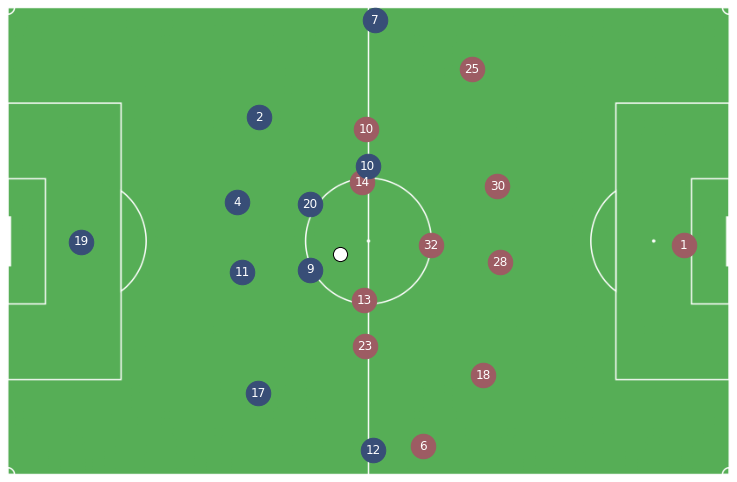

In [9]:
plt.rcParams["figure.figsize"] = [10.5, 6.8]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("./image/field.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 10500, 0, 6800])
for i in range(len(team_H)):
    plt.scatter(X[20,team_H[i]],Y[20,team_H[i]],c='#9d5c63',s=600)    
    plt.text(X[20,team_H[i]],Y[20,team_H[i]],"%s" %players_home.num[i],fontsize=12,ha="center",va='center',c='w')
for i in range(len(team_V)): 
    plt.scatter(X[20,team_V[i]],Y[20,team_V[i]],c='#384e77',s=600)    
    plt.text(X[20,team_V[i]],Y[20,team_V[i]],"%s" %players_vis.num[i],fontsize=12,ha="center",va='center',c='w')
plt.scatter(X[20,'Ball'],Y[20,'Ball'],c='w',edgecolors='k',s=200)
#plt.xlim(0,10500)
#plt.ylim(0,6800)
ax.axis('off')
plt.show()

Read the event data csv file

In [10]:
events = pd.read_csv('./Raw_data_DEMO_GAME/EVENT_DATA/FC-Cerberus_FC-Hercules_event_data.csv', sep=',')

Select only the first half

In [11]:
event_FH = events[events.event_period=='FIRST_HALF']

Calculate fps

In [12]:
# Time in secondes at the end of the first half
time_end_FH = event_FH.event_time[len(event_FH)-1]/1000

In [13]:
# frame per second for the first half
fps = len(first_half) / time_end_FH
# => ~ 25 fps

Matching timing between event and tracking data

Let's see if at a corner time, the tracking data is at this same corner time

In [14]:
corner  = event_FH[event_FH.filtered_event_types.str.contains('cornerKick', na=False)]

In [15]:
corner = corner.reset_index()

In [16]:
corner.event_time[0]

410314

In [17]:
410314/1000*25

10257.85

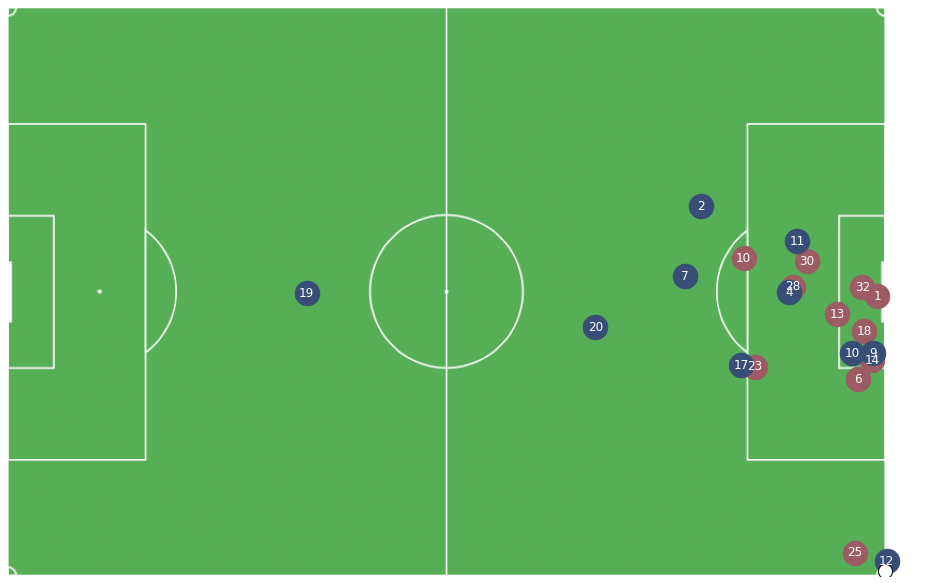

In [18]:
plt.rcParams["figure.figsize"] = [10.5*1.25, 6.8*1.25]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("./image/field.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 10500, 0, 6800])
for i in range(len(team_H)):
    plt.scatter(X[10258,team_H[i]],Y[10258,team_H[i]],c='#9d5c63',s=600)    
    plt.text(X[10258,team_H[i]],Y[10258,team_H[i]],"%s" %players_home.num[i],fontsize=12,ha="center",va='center',c='w')
for i in range(len(team_V)): 
    plt.scatter(X[10258,team_V[i]],Y[10258,team_V[i]],c='#384e77',s=600)    
    plt.text(X[10258,team_V[i]],Y[10258,team_V[i]],"%s" %players_vis.num[i],fontsize=12,ha="center",va='center',c='w')
plt.scatter(X[10258,'Ball'],Y[10258,'Ball'],c='w',edgecolors='k',s=200)
#plt.xlim(0,10500)
#plt.ylim(0,6800)
ax.axis('off')
plt.show()

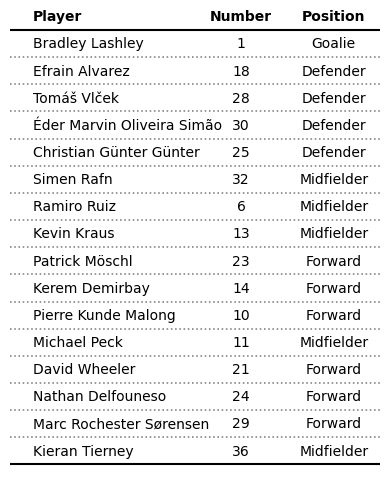

In [19]:
fig = plt.figure(figsize=(4,5), dpi=100)
ax = plt.subplot()

ncols = 3
nrows = players_home.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['name', 'num', 'pos']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        text_label = f'{players_home[column].iloc[i]}'
        weight = 'normal'
        ax.annotate(
            xy=(positions[j], nrows - i),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Player', 'Number', 'Position']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .75),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows+0.5, nrows+0.5], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0.5, 0.5], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x+0.5, x+0.5], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()


# plt.savefig(
#     'figures/pretty_example.png',
#     dpi=300,
#     transparent=True,
#     bbox_inches='tight'
# )

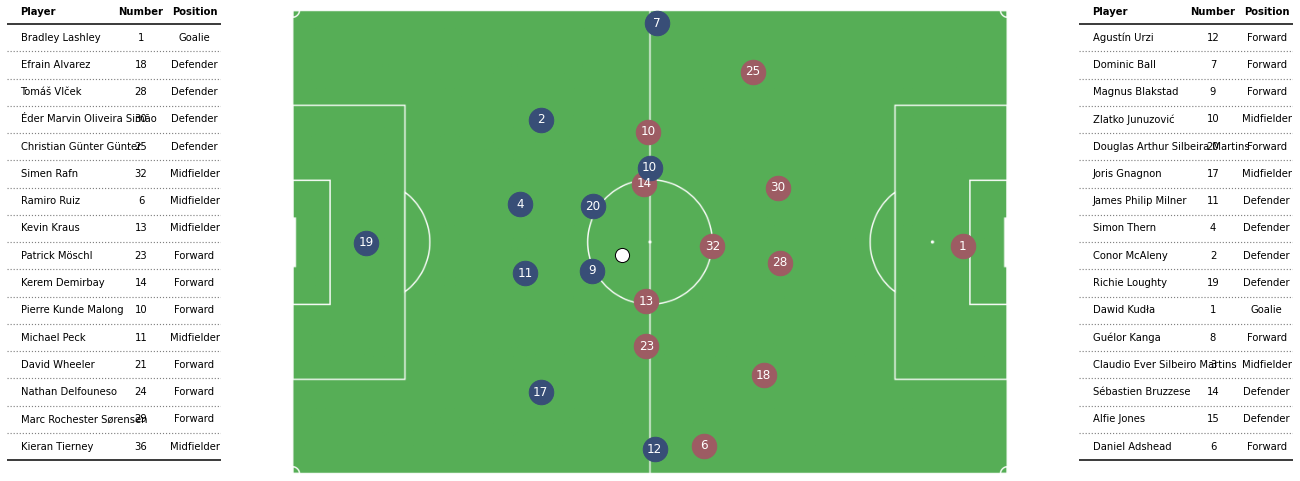

In [20]:
plt.rcParams["figure.figsize"] = [10.5*1.75, 6.8]
plt.rcParams["figure.autolayout"] = True

im = plt.imread("./image/field.png")

fig, (ax1,ax2,ax3) = plt.subplots(1,3, gridspec_kw={'width_ratios': [1.25,5,1.25]})

fig.patch.set_visible(False)

im = ax2.imshow(im, extent=[0, 10500, 0, 6800])
for i in range(len(team_H)):
    ax2.scatter(X[20,team_H[i]],Y[20,team_H[i]],c='#9d5c63',s=600)    
    ax2.text(X[20,team_H[i]],Y[20,team_H[i]],"%s" %players_home.num[i],fontsize=12,ha="center",va='center',c='w')
for i in range(len(team_V)): 
    ax2.scatter(X[20,team_V[i]],Y[20,team_V[i]],c='#384e77',s=600)    
    ax2.text(X[20,team_V[i]],Y[20,team_V[i]],"%s" %players_vis.num[i],fontsize=12,ha="center",va='center',c='w')
ax2.scatter(X[20,'Ball'],Y[20,'Ball'],c='w',edgecolors='k',s=200)
#plt.xlim(0,10500)
#plt.ylim(0,6800)
ax2.axis('off')



# left table for home players
ncols = 3
nrows = players_home.shape[0]

ax1.set_xlim(0, ncols + 1)
ax1.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['name', 'num', 'pos']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        text_label = f'{players_home[column].iloc[i]}'
        weight = 'normal'
        ax1.annotate(
            xy=(positions[j], nrows - i),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Player', 'Number', 'Position']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax1.annotate(
            xy=(positions[index], nrows + .75),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [nrows+0.5, nrows+0.5], lw=1.5, color='black', marker='', zorder=4)
ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [0.5, 0.5], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [x+0.5, x+0.5], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax1.set_axis_off()


# right table for visitor players
ncols = 3
nrows = players_vis.shape[0]

ax3.set_xlim(0, ncols + 1)
ax3.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['name', 'num', 'pos']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        text_label = f'{players_vis[column].iloc[i]}'
        weight = 'normal'
        ax3.annotate(
            xy=(positions[j], nrows - i),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Player', 'Number', 'Position']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax3.annotate(
            xy=(positions[index], nrows + .75),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax3.plot([ax3.get_xlim()[0], ax3.get_xlim()[1]], [nrows+0.5, nrows+0.5], lw=1.5, color='black', marker='', zorder=4)
ax3.plot([ax3.get_xlim()[0], ax3.get_xlim()[1]], [0.5, 0.5], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax3.plot([ax3.get_xlim()[0], ax3.get_xlim()[1]], [x+0.5, x+0.5], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax3.set_axis_off()




#fig.tight_layout()
plt.show()

Well done! 

To do : 
- Use only soccers' last names
- Change background color with shirt color

Passes between players

In [ ]:
passes  = event_FH[event_FH.filtered_event_types.str.contains('passSucceeded', na=False)]
passes = passes.reset_index()

In [22]:
import re

passes_f = []
passes_t = []

for i in passes.index:
    passes_f = np.append(passes_f, re.findall("passSucceededFrom\d+", passes.event_types[i]))
    passes_t = np.append(passes_t, re.findall("passSucceededTo\d+", passes.event_types[i]))

passes_from = []
passes_to = []

for i in passes.index:
    passes_from = np.append(passes_from,int(passes_f[i][17:19]))
    passes_to = np.append(passes_to,int(passes_t[i][15:17]))

In [23]:
passes_time = []

for i in passes.iandex:
    passes_time = np.append(passes_time, passes.event_time[i]/1000*25)

In [30]:
passes_team = []

for i in passes.index:
    passes_team = np.append(passes_team, passes.team_id[i])

Player by players and team by team

Create a dict for simplify

In [51]:
passes_FH = pd.DataFrame(columns=['Time','From','To','Team'],index=np.arange(0,len(passes)))

passes_FH.Time = passes_time
passes_FH.From = passes_from
passes_FH.To = passes_to
passes_FH.Team = passes_team

passes_FH


,Time,From,To,Team
0,10.350,11.0,8.0,9829.0
1,53.475,11.0,8.0,9829.0
2,118.050,11.0,5.0,9829.0
3,169.975,11.0,5.0,9829.0
4,224.825,8.0,8.0,9829.0
...,...,...,...,...
320,71282.425,11.0,9.0,9828.0
321,71409.325,11.0,9.0,9828.0
322,71433.875,11.0,5.0,9828.0
323,71682.925,11.0,5.0,9829.0


In [55]:
Passers_home = passes_FH[passes_FH.Team == np.float64(ID_home['id'])]
Passer1F_home = np.bincount(Passers_home.From).argmax()

Passes1F_home = Passers_home[Passers_home.From == np.float64(Passer1F_home)]
Passes1F_home = Passes1F_home.astype(int)
Passes1F_home

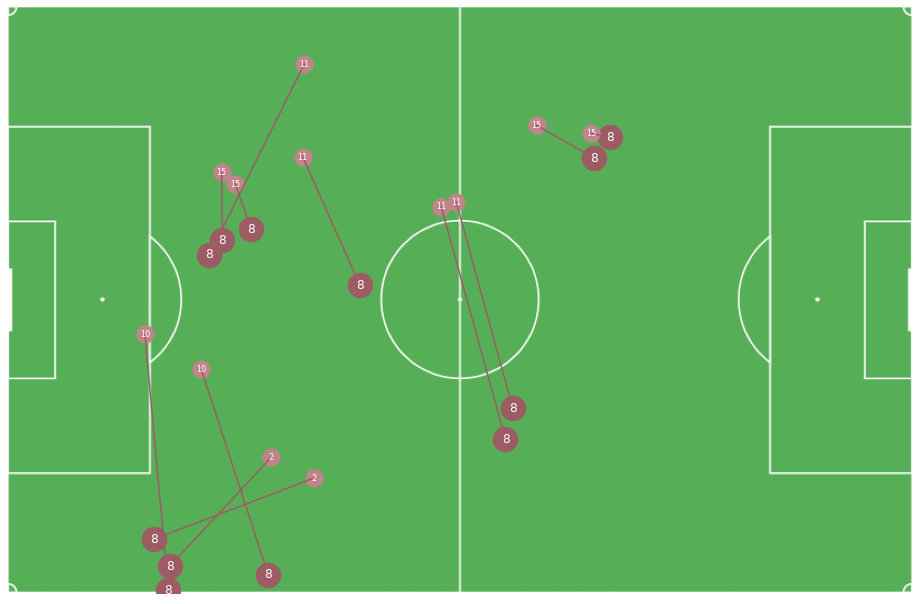

In [86]:
plt.rcParams["figure.figsize"] = [10.5*1.25, 6.8*1.25]
plt.rcParams["figure.autolayout"] = True

im = plt.imread("./image/field.png")

fig, ax = plt.subplots()

im = ax.imshow(im, extent=[0, 10500, 0, 6800])

for i in Passes1F_home.index:
    plt.scatter(X[Passes1F_home.Time[i], 'Player%s' %Passer1F_home], Y[Passes1F_home.Time[i], 'Player%s' %Passer1F_home], c='#9d5c63', s=600)    
    plt.text(X[Passes1F_home.Time[i], 'Player%s' %Passer1F_home], Y[Passes1F_home.Time[i], 'Player%s' %Passer1F_home], "%s" %str(Passer1F_home), fontsize=12, ha="center", va='center', c='w')

    plt.scatter(X[Passes1F_home.Time[i], 'Player%s' %int(Passes1F_home.To[i])], Y[Passes1F_home.Time[i], 'Player%s' %int(Passes1F_home.To[i])], c='#bf858b', s=300)    
    plt.text(X[Passes1F_home.Time[i], 'Player%s' %int(Passes1F_home.To[i])], Y[Passes1F_home.Time[i], 'Player%s' %int(Passes1F_home.To[i])], "%s" %str(int(Passes1F_home.To[i])), fontsize=8, ha="center", va='center', c='w')

    plt.plot([X[Passes1F_home.Time[i], 'Player%s' %Passer1F_home], X[Passes1F_home.Time[i], 'Player%s' %int(Passes1F_home.To[i])]], [Y[Passes1F_home.Time[i], 'Player%s' %Passer1F_home], Y[Passes1F_home.Time[i], 'Player%s' %int(Passes1F_home.To[i])]], c='#9d5c63')    


ax.axis('off')
plt.show()

In [83]:
Passers_vis = passes_FH[passes_FH.Team == np.float64(ID_vis['id'])]
Passer1F_vis = np.bincount(Passers_vis.From).argmax()

Passes1F_vis = Passers_vis[Passers_vis.From == np.float64(Passer1F_vis)]
Passes1F_vis = Passes1F_vis.astype(int)
Passes1F_vis

,Time,From,To,Team
4,224,8,8,9829
5,253,8,8,9829
6,287,8,5,9829
7,381,8,5,9829
20,4281,8,8,9829
21,4355,8,8,9829
22,5936,8,12,9829
23,6196,8,12,9829
40,8887,8,11,9829
41,8938,8,11,9829


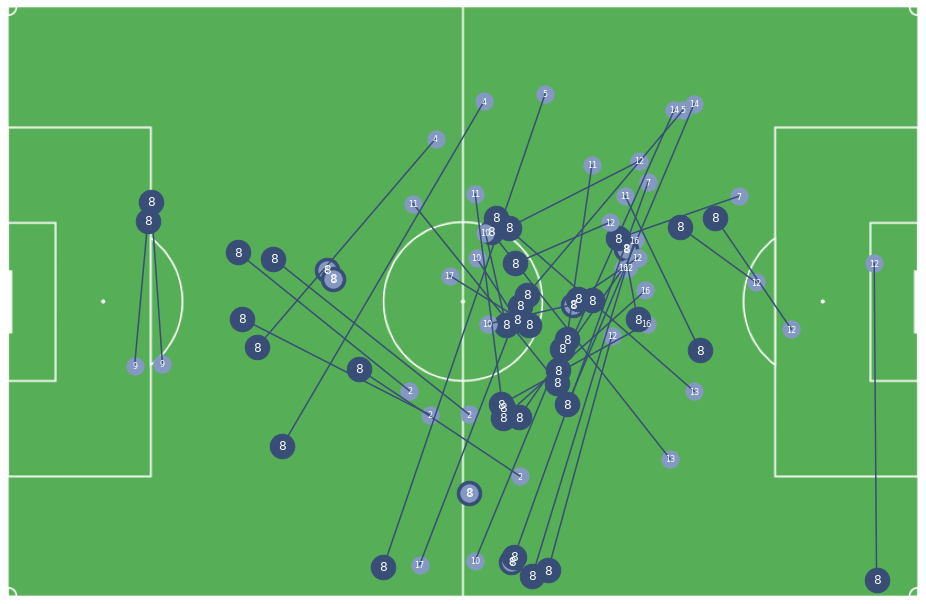

In [88]:
plt.rcParams["figure.figsize"] = [10.5*1.25, 6.8*1.25]
plt.rcParams["figure.autolayout"] = True

im = plt.imread("./image/field.png")

fig, ax = plt.subplots()

im = ax.imshow(im, extent=[0, 10500, 0, 6800])

for i in Passes1F_vis.index:
    plt.scatter(X[Passes1F_vis.Time[i], 'Player%s' %Passer1F_vis], Y[Passes1F_vis.Time[i], 'Player%s' %Passer1F_vis], c='#384e77', s=600)    
    plt.text(X[Passes1F_vis.Time[i], 'Player%s' %Passer1F_vis], Y[Passes1F_vis.Time[i], 'Player%s' %Passer1F_vis], "%s" %str(Passer1F_vis), fontsize=12, ha="center", va='center', c='w')

    plt.scatter(X[Passes1F_vis.Time[i], 'Player%s' %int(Passes1F_vis.To[i])], Y[Passes1F_vis.Time[i], 'Player%s' %int(Passes1F_vis.To[i])], c='#8499c2', s=300)    
    plt.text(X[Passes1F_vis.Time[i], 'Player%s' %int(Passes1F_vis.To[i])], Y[Passes1F_vis.Time[i], 'Player%s' %int(Passes1F_vis.To[i])], "%s" %str(int(Passes1F_vis.To[i])), fontsize=8, ha="center", va='center', c='w')

    plt.plot([X[Passes1F_vis.Time[i], 'Player%s' %Passer1F_vis], X[Passes1F_vis.Time[i], 'Player%s' %int(Passes1F_vis.To[i])]], [Y[Passes1F_vis.Time[i], 'Player%s' %Passer1F_vis], Y[Passes1F_vis.Time[i], 'Player%s' %int(Passes1F_vis.To[i])]], c='#384e77')    

ax.axis('off')
plt.show()

To do : plot shots positions